In [153]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from env.config import consumer_key, consumer_secret, access_token, access_token_secret

In [154]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [155]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [156]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [157]:
# Target Search Term  #BBC, CBS, CNN, Fox, and New York times.
target_terms = ("@BBC","@CBS","@CNNbrk","@Fox","@NYT")
colors= {"@BBC":'cyan',"@CBS":'green',"@CNNbrk":'red',"@Fox":'blue',"@NYT":'orange'}

# "Real Person" tweets Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Variables for holding sentiments
sentiments = []

In [158]:
# Loop through all target users
for target in target_terms:
    # Counter
    counter = 1

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                tweets_ago = counter
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
    
                # Add sentiments for each tweet into a list
                sentiments.append({"Date": tweet["created_at"],
                                   "User": target,
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})

                # Add to counter 
                counter += 1

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out.

In [159]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
# groupby_sentiments_pd = sentiments_pd.groupby('User',axis=0)

#Export the data in the DataFrame into a CSV file
sentiments_pd.to_csv('media_sentiment_analysis.csv')

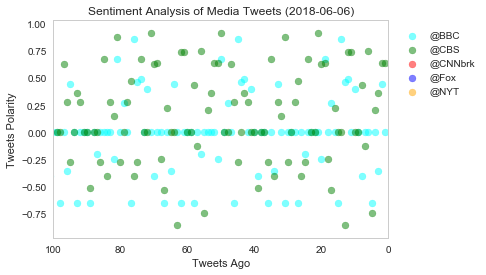

In [160]:
plot ={}

fig = plt.figure(1)
ax = fig.add_subplot(111)

# Loop through all target media
for target in target_terms:
    color = colors[target]
    target_media = sentiments_pd.loc[sentiments_pd["User"]==target,:]
    x = target_media['Tweets Ago']
    y = target_media['Compound']
    plot[target] = ax.scatter(x, y,color=color, marker="o", label = target, alpha=0.5)#,label=combined_unemployed_data.loc['USA',"Country Name"]
    

ax.legend(loc='center', bbox_to_anchor=(1.15, 0.8))
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim(100,0)
plt.grid()
plt.ylabel('Tweets Polarity')
plt.xlabel('Tweets Ago')
plt.savefig("Sentiment_Analysis_of_Media_Tweets.png");
plt.show();


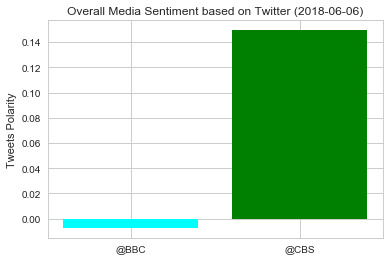

In [161]:
media_sources_Mean_df = sentiments_pd.groupby("User").mean()#.set_index("User")
average_compound = media_sources_Mean_df['Compound']
media =average_compound.index
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel('Tweets Polarity') 
plt.bar(media,average_compound,color = ['cyan', 'green',  'red', 'blue', 'orange']);
plt.savefig("Overall_Media_Sentiment_based_on_Twitter.png");
plt.show();


### Observations
#### 1
#### 1
#### 1

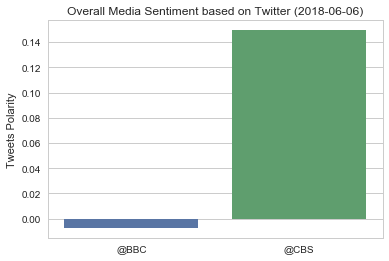

In [162]:
#practice seaborn plots

sns.set(style="whitegrid")
ax = sns.barplot(media, average_compound)
ax.set(xlabel='',ylabel='Tweets Polarity', title=f"Overall Media Sentiment based on Twitter ({now})")
plt.show()